In [1]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.getcwd())
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [3]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_cost.csv'

In [4]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0.008758,0.009106,0.008733,0.001984,0.001984,0.001953
1,0.002760,0.002864,0.002754,0.002026,0.002031,0.001973
2,0.003095,0.003279,0.003095,0.002107,0.002122,0.002053
3,0.003293,0.003545,0.003320,0.002090,0.002136,0.002052
4,0.003165,0.003416,0.003203,0.002052,0.002118,0.002027


In [5]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0,0.008758,0.009106,0.008733,0.001984,0.001984,0.001953
1,1,0.002760,0.002864,0.002754,0.002026,0.002031,0.001973
2,2,0.003095,0.003279,0.003095,0.002107,0.002122,0.002053
3,3,0.003293,0.003545,0.003320,0.002090,0.002136,0.002052
4,4,0.003165,0.003416,0.003203,0.002052,0.002118,0.002027


In [6]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0,0.008758,0.009106,0.008733,0.001984,0.001984,0.001953
1,1,0.002760,0.002864,0.002754,0.002026,0.002031,0.001973
2,2,0.003095,0.003279,0.003095,0.002107,0.002122,0.002053
3,3,0.003293,0.003545,0.003320,0.002090,0.002136,0.002052
4,4,0.003165,0.003416,0.003203,0.002052,0.002118,0.002027


In [7]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,1,0.008758,0.009106,0.008733,0.001984,0.001984,0.001953
1,2,0.002760,0.002864,0.002754,0.002026,0.002031,0.001973
2,3,0.003095,0.003279,0.003095,0.002107,0.002122,0.002053
3,4,0.003293,0.003545,0.003320,0.002090,0.002136,0.002052
4,5,0.003165,0.003416,0.003203,0.002052,0.002118,0.002027


In [8]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_hypothesis'], axis=1)
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_training_hypothesis,cost_validation_hypothesis
0,1,0.008758,0.009106,0.001984,0.001984
1,2,0.002760,0.002864,0.002026,0.002031
2,3,0.003095,0.003279,0.002107,0.002122
3,4,0.003293,0.003545,0.002090,0.002136
4,5,0.003165,0.003416,0.002052,0.002118


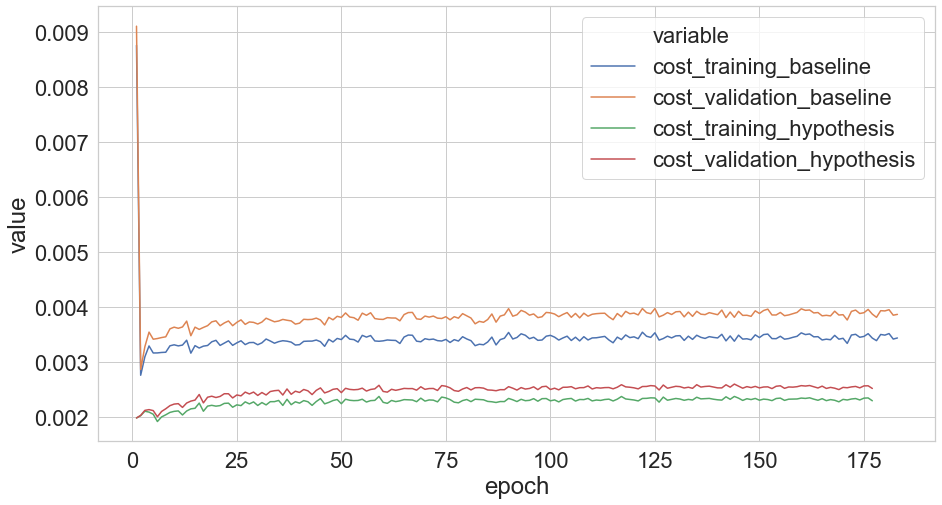

In [9]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('FB15k_Cost_Results.png', bbox_inches = "tight", format='PNG')

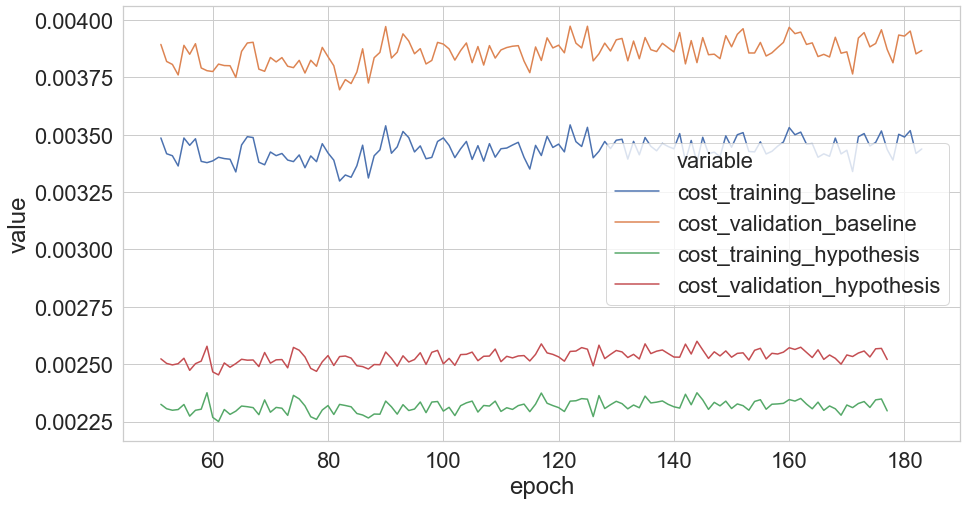

In [10]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[50:], ['epoch']))
plt.savefig('FB15k_Cost_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [11]:
path = get_path('hntn_train_validate_and_test_FB15k_200d_hits_at_10.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_FB15k_200d_hits_at_10.csv'

In [12]:
results_hits_at_10 = pd.read_csv(path)
results_hits_at_10.head()

,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0.068562,0.06739,0.067504,0.12429,0.12022,0.125375
1,0.298158,0.28876,0.303685,0.33805,0.31852,0.342148
2,0.526231,0.48687,0.513027,0.53190,0.48303,0.511461
3,0.651673,0.58038,0.616783,0.68215,0.59145,0.628718
4,0.712752,0.62636,0.663430,0.77110,0.65301,0.696306


In [13]:
results_hits_at_10 = results_hits_at_10.reset_index()
results_hits_at_10.head()

,index,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0,0.068562,0.06739,0.067504,0.12429,0.12022,0.125375
1,1,0.298158,0.28876,0.303685,0.33805,0.31852,0.342148
2,2,0.526231,0.48687,0.513027,0.53190,0.48303,0.511461
3,3,0.651673,0.58038,0.616783,0.68215,0.59145,0.628718
4,4,0.712752,0.62636,0.663430,0.77110,0.65301,0.696306


In [14]:
results_hits_at_10 = results_hits_at_10.rename(columns={'index': 'epoch'})
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0,0.068562,0.06739,0.067504,0.12429,0.12022,0.125375
1,1,0.298158,0.28876,0.303685,0.33805,0.31852,0.342148
2,2,0.526231,0.48687,0.513027,0.53190,0.48303,0.511461
3,3,0.651673,0.58038,0.616783,0.68215,0.59145,0.628718
4,4,0.712752,0.62636,0.663430,0.77110,0.65301,0.696306


In [15]:
results_hits_at_10['epoch'] += 1
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,1,0.068562,0.06739,0.067504,0.12429,0.12022,0.125375
1,2,0.298158,0.28876,0.303685,0.33805,0.31852,0.342148
2,3,0.526231,0.48687,0.513027,0.53190,0.48303,0.511461
3,4,0.651673,0.58038,0.616783,0.68215,0.59145,0.628718
4,5,0.712752,0.62636,0.663430,0.77110,0.65301,0.696306


In [16]:
results_hits_at_10_test = results_hits_at_10[['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis']]
results_hits_at_10_test.head()

,hits_at_10_test_baseline,hits_at_10_test_hypothesis
0,0.067504,0.125375
1,0.303685,0.342148
2,0.513027,0.511461
3,0.616783,0.628718
4,0.663430,0.696306


In [17]:
results_hits_at_10_test.max()

hits_at_10_test_baseline      0.879603
hits_at_10_test_hypothesis    0.894424
dtype: float64

In [18]:
results_hits_at_10 = results_hits_at_10.drop(['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis'], axis=1)
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis
0,1,0.068562,0.06739,0.12429,0.12022
1,2,0.298158,0.28876,0.33805,0.31852
2,3,0.526231,0.48687,0.53190,0.48303
3,4,0.651673,0.58038,0.68215,0.59145
4,5,0.712752,0.62636,0.77110,0.65301


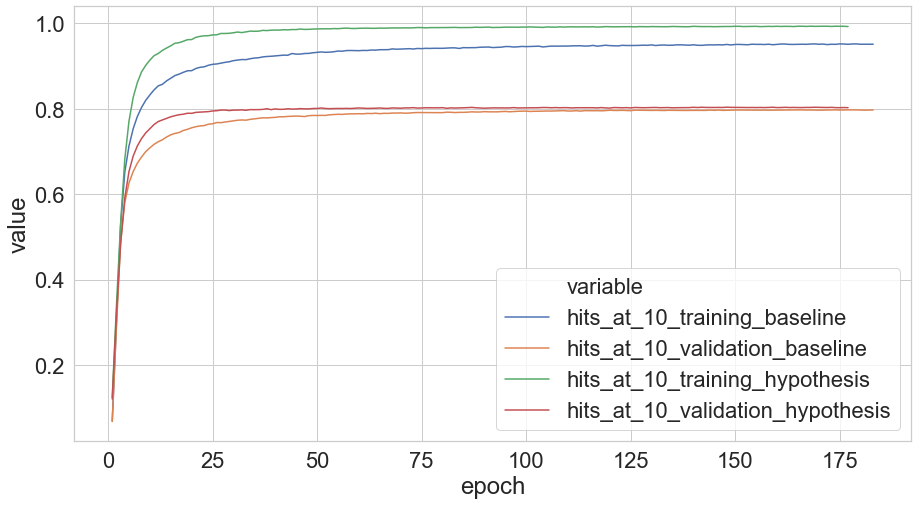

In [19]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10, ['epoch']))
plt.savefig('FB15k_hits_at_10_Results.png', bbox_inches = "tight", format='PNG')

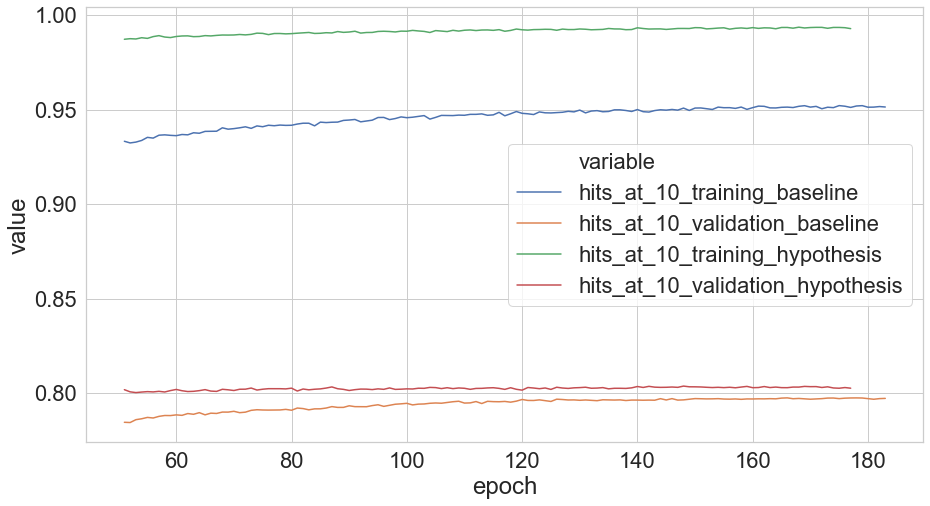

In [20]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[50:], ['epoch']))
plt.savefig('FB15k_hits_at_10_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [34]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_hits_at_3.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_hits_at_3.csv'

In [35]:
results_hits_at_3 = pd.read_csv(path)
results_hits_at_3.head()

,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0.038115,0.03650,0.035559,0.08570,0.08101,0.084906
1,0.201503,0.19554,0.216062,0.22713,0.21182,0.242699
2,0.378375,0.34411,0.386374,0.38842,0.34259,0.384834
3,0.498840,0.42670,0.485128,0.53416,0.43959,0.499738
4,0.563762,0.46795,0.533849,0.63251,0.49759,0.568824


In [36]:
results_hits_at_3 = results_hits_at_3.reset_index()
results_hits_at_3.head()

,index,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0,0.038115,0.03650,0.035559,0.08570,0.08101,0.084906
1,1,0.201503,0.19554,0.216062,0.22713,0.21182,0.242699
2,2,0.378375,0.34411,0.386374,0.38842,0.34259,0.384834
3,3,0.498840,0.42670,0.485128,0.53416,0.43959,0.499738
4,4,0.563762,0.46795,0.533849,0.63251,0.49759,0.568824


In [37]:
results_hits_at_3 = results_hits_at_3.rename(columns={'index': 'epoch'})
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0,0.038115,0.03650,0.035559,0.08570,0.08101,0.084906
1,1,0.201503,0.19554,0.216062,0.22713,0.21182,0.242699
2,2,0.378375,0.34411,0.386374,0.38842,0.34259,0.384834
3,3,0.498840,0.42670,0.485128,0.53416,0.43959,0.499738
4,4,0.563762,0.46795,0.533849,0.63251,0.49759,0.568824


In [38]:
results_hits_at_3['epoch'] += 1
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,1,0.038115,0.03650,0.035559,0.08570,0.08101,0.084906
1,2,0.201503,0.19554,0.216062,0.22713,0.21182,0.242699
2,3,0.378375,0.34411,0.386374,0.38842,0.34259,0.384834
3,4,0.498840,0.42670,0.485128,0.53416,0.43959,0.499738
4,5,0.563762,0.46795,0.533849,0.63251,0.49759,0.568824


In [39]:
results_hits_at_3_test = results_hits_at_3[['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis']]
results_hits_at_3_test.head()

,hits_at_3_test_baseline,hits_at_3_test_hypothesis
0,0.035559,0.084906
1,0.216062,0.242699
2,0.386374,0.384834
3,0.485128,0.499738
4,0.533849,0.568824


In [40]:
results_hits_at_3_test.max()

hits_at_3_test_baseline      0.816721
hits_at_3_test_hypothesis    0.855589
dtype: float64

In [41]:
results_hits_at_3 = results_hits_at_3.drop(['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis'], axis=1)
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis
0,1,0.038115,0.03650,0.08570,0.08101
1,2,0.201503,0.19554,0.22713,0.21182
2,3,0.378375,0.34411,0.38842,0.34259
3,4,0.498840,0.42670,0.53416,0.43959
4,5,0.563762,0.46795,0.63251,0.49759


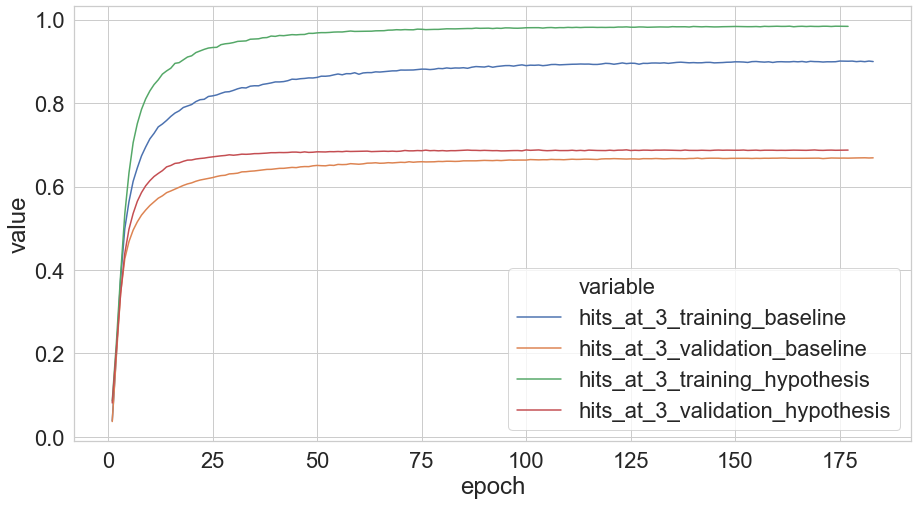

In [42]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3, ['epoch']))
plt.savefig('FB15k_hits_at_3_Results.png', bbox_inches = "tight", format='PNG')

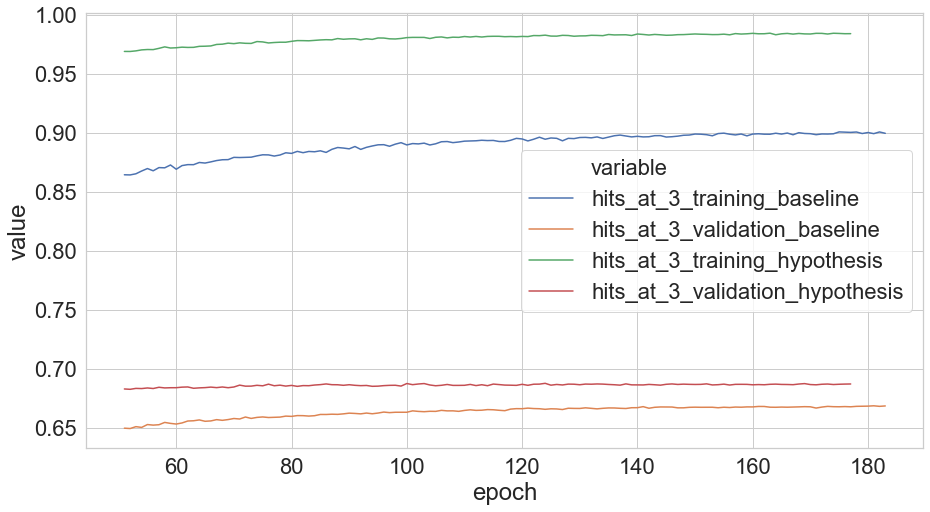

In [43]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[50:], ['epoch']))
plt.savefig('FB15k_hits_at_3_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [44]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_hits_at_1.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_hits_at_1.csv'

In [45]:
results_hits_at_1 = pd.read_csv(path)
results_hits_at_1.head()

,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0.021491,0.02035,0.021703,0.05326,0.04973,0.052835
1,0.125527,0.12114,0.145097,0.14164,0.13074,0.163236
2,0.233194,0.20670,0.254583,0.24623,0.21087,0.258613
3,0.321071,0.26313,0.329112,0.36093,0.27704,0.347159
4,0.379746,0.29470,0.372433,0.45331,0.32169,0.410083


In [46]:
results_hits_at_1 = results_hits_at_1.reset_index()
results_hits_at_1.head()

,index,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0,0.021491,0.02035,0.021703,0.05326,0.04973,0.052835
1,1,0.125527,0.12114,0.145097,0.14164,0.13074,0.163236
2,2,0.233194,0.20670,0.254583,0.24623,0.21087,0.258613
3,3,0.321071,0.26313,0.329112,0.36093,0.27704,0.347159
4,4,0.379746,0.29470,0.372433,0.45331,0.32169,0.410083


In [47]:
results_hits_at_1 = results_hits_at_1.rename(columns={'index': 'epoch'})
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0,0.021491,0.02035,0.021703,0.05326,0.04973,0.052835
1,1,0.125527,0.12114,0.145097,0.14164,0.13074,0.163236
2,2,0.233194,0.20670,0.254583,0.24623,0.21087,0.258613
3,3,0.321071,0.26313,0.329112,0.36093,0.27704,0.347159
4,4,0.379746,0.29470,0.372433,0.45331,0.32169,0.410083


In [48]:
results_hits_at_1['epoch'] += 1
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,1,0.021491,0.02035,0.021703,0.05326,0.04973,0.052835
1,2,0.125527,0.12114,0.145097,0.14164,0.13074,0.163236
2,3,0.233194,0.20670,0.254583,0.24623,0.21087,0.258613
3,4,0.321071,0.26313,0.329112,0.36093,0.27704,0.347159
4,5,0.379746,0.29470,0.372433,0.45331,0.32169,0.410083


In [49]:
results_hits_at_1_test = results_hits_at_1[['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis']]
results_hits_at_1_test.head()

,hits_at_1_test_baseline,hits_at_1_test_hypothesis
0,0.021703,0.052835
1,0.145097,0.163236
2,0.254583,0.258613
3,0.329112,0.347159
4,0.372433,0.410083


In [50]:
results_hits_at_1_test.max()

hits_at_1_test_baseline      0.696145
hits_at_1_test_hypothesis    0.790464
dtype: float64

In [51]:
results_hits_at_1 = results_hits_at_1.drop(['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis'], axis=1)
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis
0,1,0.021491,0.02035,0.05326,0.04973
1,2,0.125527,0.12114,0.14164,0.13074
2,3,0.233194,0.20670,0.24623,0.21087
3,4,0.321071,0.26313,0.36093,0.27704
4,5,0.379746,0.29470,0.45331,0.32169


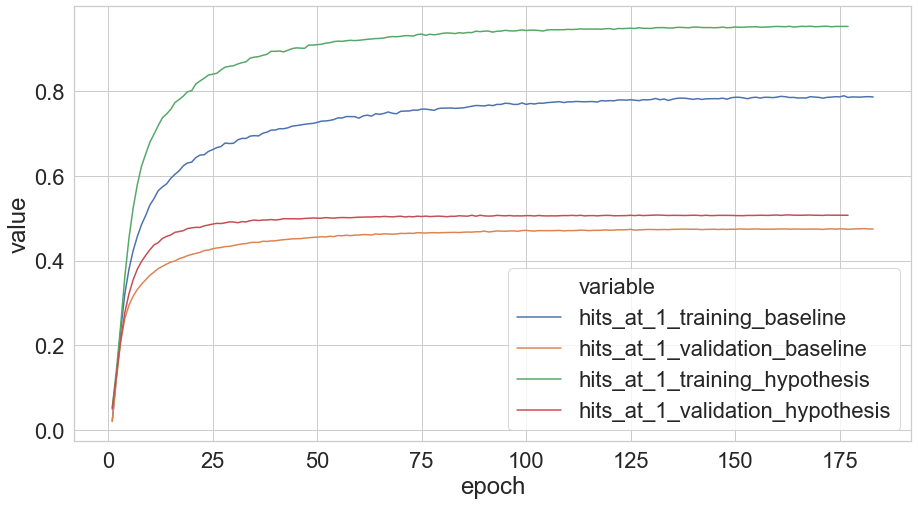

In [52]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1, ['epoch']))
plt.savefig('FB15k_hits_at_1_Results.png', bbox_inches = "tight", format='PNG')

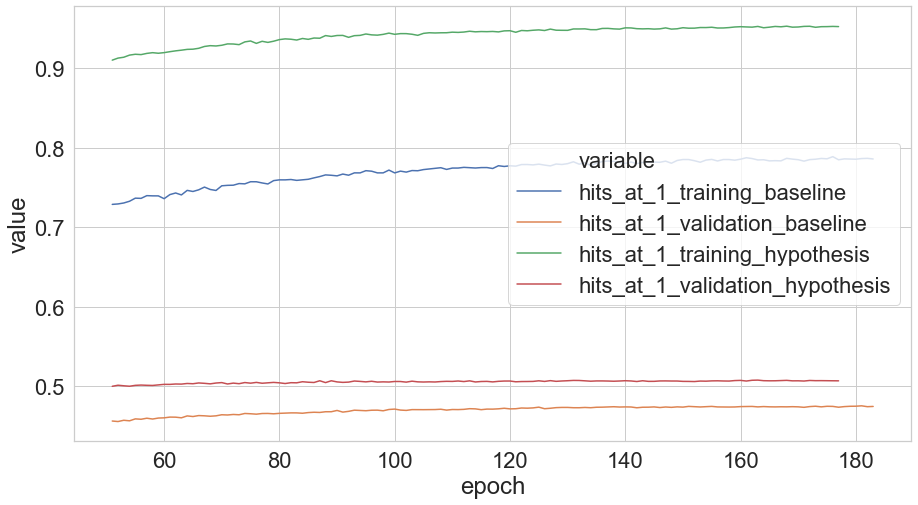

In [53]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[50:], ['epoch']))
plt.savefig('FB15k_hits_at_1_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [54]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_mean_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_mean_rank.csv'

In [55]:
results_mean_rank = pd.read_csv(path)
results_mean_rank.head()

,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,3409.146612,3535.78775,3536.309856,2951.38370,3100.63244,3083.484087
1,798.620465,891.54089,882.500643,595.25398,675.10654,664.900230
2,238.263513,296.22914,288.944846,213.07873,292.24172,283.677566
3,123.978941,181.10141,177.850764,89.79686,164.81615,162.553241
4,104.322476,158.38124,155.951296,38.53240,111.46652,107.034095


In [56]:
results_mean_rank = results_mean_rank.reset_index()
results_mean_rank.head()

,index,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,0,3409.146612,3535.78775,3536.309856,2951.38370,3100.63244,3083.484087
1,1,798.620465,891.54089,882.500643,595.25398,675.10654,664.900230
2,2,238.263513,296.22914,288.944846,213.07873,292.24172,283.677566
3,3,123.978941,181.10141,177.850764,89.79686,164.81615,162.553241
4,4,104.322476,158.38124,155.951296,38.53240,111.46652,107.034095


In [57]:
results_mean_rank = results_mean_rank.rename(columns={'index': 'epoch'})
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,0,3409.146612,3535.78775,3536.309856,2951.38370,3100.63244,3083.484087
1,1,798.620465,891.54089,882.500643,595.25398,675.10654,664.900230
2,2,238.263513,296.22914,288.944846,213.07873,292.24172,283.677566
3,3,123.978941,181.10141,177.850764,89.79686,164.81615,162.553241
4,4,104.322476,158.38124,155.951296,38.53240,111.46652,107.034095


In [58]:
results_mean_rank['epoch'] += 1
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,1,3409.146612,3535.78775,3536.309856,2951.38370,3100.63244,3083.484087
1,2,798.620465,891.54089,882.500643,595.25398,675.10654,664.900230
2,3,238.263513,296.22914,288.944846,213.07873,292.24172,283.677566
3,4,123.978941,181.10141,177.850764,89.79686,164.81615,162.553241
4,5,104.322476,158.38124,155.951296,38.53240,111.46652,107.034095


In [59]:
results_mean_rank_test = results_mean_rank[['mean_rank_test_baseline', 'mean_rank_test_hypothesis']]
results_mean_rank_test.head()

,mean_rank_test_baseline,mean_rank_test_hypothesis
0,3536.309856,3083.484087
1,882.500643,664.900230
2,288.944846,283.677566
3,177.850764,162.553241
4,155.951296,107.034095


In [60]:
results_mean_rank_test.min()

mean_rank_test_baseline      72.772350
mean_rank_test_hypothesis    79.188282
dtype: float64

In [61]:
results_mean_rank = results_mean_rank.drop(['mean_rank_test_baseline', 'mean_rank_test_hypothesis'], axis=1)
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis
0,1,3409.146612,3535.78775,2951.38370,3100.63244
1,2,798.620465,891.54089,595.25398,675.10654
2,3,238.263513,296.22914,213.07873,292.24172
3,4,123.978941,181.10141,89.79686,164.81615
4,5,104.322476,158.38124,38.53240,111.46652


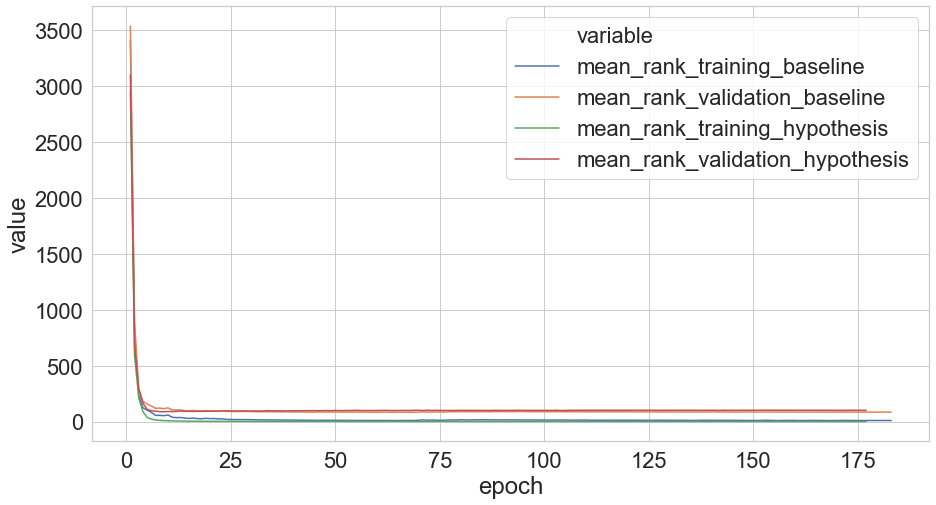

In [62]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank, ['epoch']))
plt.savefig('FB15k_mean_rank_Results.png', bbox_inches = "tight", format='PNG')

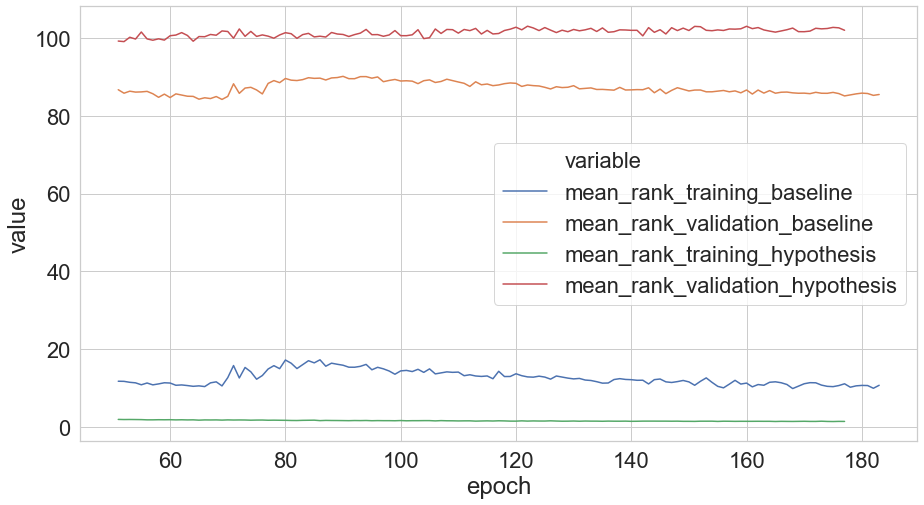

In [63]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[50:], ['epoch']))
plt.savefig('FB15k_mean_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [64]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_mean_reciprocal_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_mean_reciprocal_rank.csv'

In [65]:
results_mean_reciprocal_rank = pd.read_csv(path)
results_mean_reciprocal_rank.head()

,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0.038074,0.036763,0.037318,0.079306,0.075380,0.079059
1,0.184518,0.178800,0.199775,0.207961,0.194355,0.224567
2,0.333258,0.302474,0.345305,0.344082,0.303379,0.346372
3,0.436164,0.372317,0.431186,0.472618,0.385275,0.446891
4,0.496059,0.408455,0.475984,0.564978,0.436014,0.511482


In [66]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.reset_index()
results_mean_reciprocal_rank.head()

,index,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0,0.038074,0.036763,0.037318,0.079306,0.075380,0.079059
1,1,0.184518,0.178800,0.199775,0.207961,0.194355,0.224567
2,2,0.333258,0.302474,0.345305,0.344082,0.303379,0.346372
3,3,0.436164,0.372317,0.431186,0.472618,0.385275,0.446891
4,4,0.496059,0.408455,0.475984,0.564978,0.436014,0.511482


In [67]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.rename(columns={'index': 'epoch'})
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0,0.038074,0.036763,0.037318,0.079306,0.075380,0.079059
1,1,0.184518,0.178800,0.199775,0.207961,0.194355,0.224567
2,2,0.333258,0.302474,0.345305,0.344082,0.303379,0.346372
3,3,0.436164,0.372317,0.431186,0.472618,0.385275,0.446891
4,4,0.496059,0.408455,0.475984,0.564978,0.436014,0.511482


In [68]:
results_mean_reciprocal_rank['epoch'] += 1
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,1,0.038074,0.036763,0.037318,0.079306,0.075380,0.079059
1,2,0.184518,0.178800,0.199775,0.207961,0.194355,0.224567
2,3,0.333258,0.302474,0.345305,0.344082,0.303379,0.346372
3,4,0.436164,0.372317,0.431186,0.472618,0.385275,0.446891
4,5,0.496059,0.408455,0.475984,0.564978,0.436014,0.511482


In [69]:
results_mean_reciprocal_rank_test = results_mean_reciprocal_rank[['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis']]
results_mean_reciprocal_rank_test.head()

,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_test_hypothesis
0,0.037318,0.079059
1,0.199775,0.224567
2,0.345305,0.346372
3,0.431186,0.446891
4,0.475984,0.511482


In [70]:
results_mean_reciprocal_rank_test.max()

mean_reciprocal_rank_test_baseline      0.765562
mean_reciprocal_rank_test_hypothesis    0.829171
dtype: float64

In [71]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.drop(['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis'], axis=1)
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis
0,1,0.038074,0.036763,0.079306,0.075380
1,2,0.184518,0.178800,0.207961,0.194355
2,3,0.333258,0.302474,0.344082,0.303379
3,4,0.436164,0.372317,0.472618,0.385275
4,5,0.496059,0.408455,0.564978,0.436014


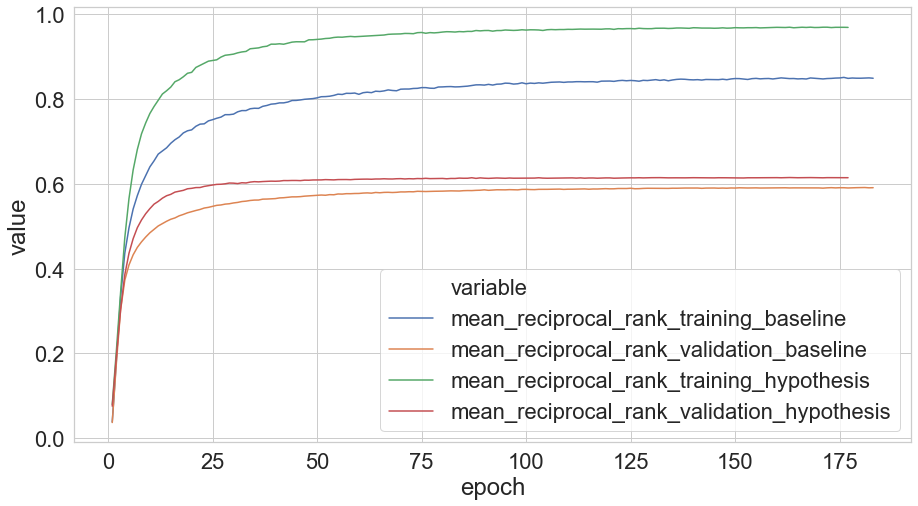

In [72]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank, ['epoch']))
plt.savefig('FB15k_mean_reciprocal_rank_Results.png', bbox_inches = "tight", format='PNG')

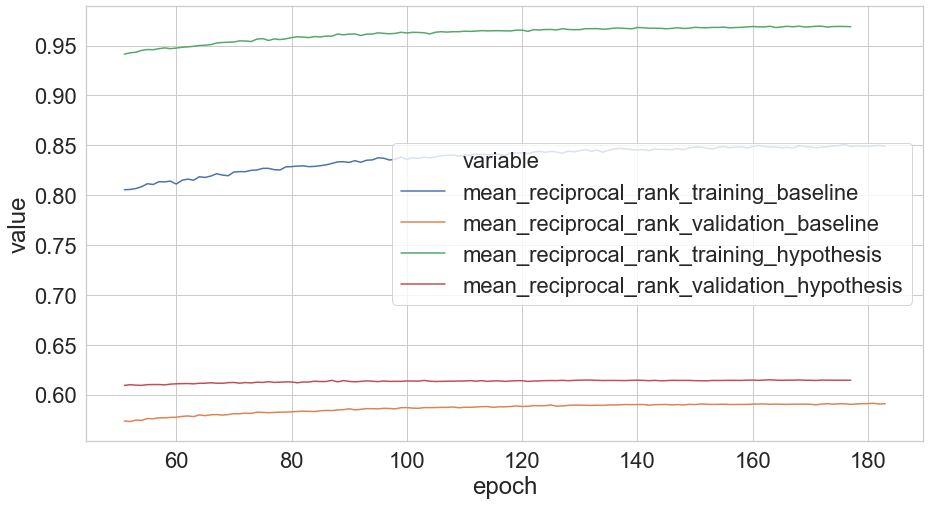

In [73]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[50:], ['epoch']))
plt.savefig('FB15k_mean_reciprocal_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')